In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns


In [2]:
import sqlite3
conn = sqlite3.connect('../data/hist_prices.db')
c = conn.cursor()

In [3]:
data = pd.read_sql('''SELECT * FROM wrapped_bitcoin''', conn)
data.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Wrapped Bitcoin,WBTC,2019-01-31 23:59:59,3535.421222,3435.290530,3496.839832,3466.506533,19289.065456,0.0
1,2,Wrapped Bitcoin,WBTC,2019-02-01 23:59:59,3517.770253,3422.825563,3469.392973,3480.772314,13640.473109,0.0
2,3,Wrapped Bitcoin,WBTC,2019-02-02 23:59:59,3546.404225,3459.112772,3476.335119,3542.095361,1894.967236,0.0
3,4,Wrapped Bitcoin,WBTC,2019-02-03 23:59:59,3544.667094,3436.177705,3540.562788,3477.866026,6524.925286,0.0
4,5,Wrapped Bitcoin,WBTC,2019-02-04 23:59:59,3500.410630,3445.643244,3481.734248,3481.219346,3540.939200,0.0


In [4]:
# Add some more features derived from the exiting ones
data['Range'] = data.High - data.Low
data['Difference'] = data.Close - data.Open

In [5]:
data.drop(labels='SNo', axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 888 entries, 0 to 887
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        888 non-null    object 
 1   Symbol      888 non-null    object 
 2   Date        888 non-null    object 
 3   High        888 non-null    float64
 4   Low         888 non-null    float64
 5   Open        888 non-null    float64
 6   Close       888 non-null    float64
 7   Volume      888 non-null    float64
 8   Marketcap   888 non-null    float64
 9   Range       888 non-null    float64
 10  Difference  888 non-null    float64
dtypes: float64(8), object(3)
memory usage: 76.4+ KB


In [6]:
#Converting Date column to Datetime
data['Date'] = pd.to_datetime(data['Date'])

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 888 entries, 0 to 887
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Name        888 non-null    object        
 1   Symbol      888 non-null    object        
 2   Date        888 non-null    datetime64[ns]
 3   High        888 non-null    float64       
 4   Low         888 non-null    float64       
 5   Open        888 non-null    float64       
 6   Close       888 non-null    float64       
 7   Volume      888 non-null    float64       
 8   Marketcap   888 non-null    float64       
 9   Range       888 non-null    float64       
 10  Difference  888 non-null    float64       
dtypes: datetime64[ns](1), float64(8), object(2)
memory usage: 76.4+ KB


In [8]:
data.describe()

,High,Low,Open,Close,Volume,Marketcap,Range,Difference
count,888.000000,888.000000,888.000000,888.000000,8.880000e+02,8.880000e+02,888.000000,888.000000
mean,17619.092654,16496.531116,17052.665626,17086.573875,5.547932e+07,1.666316e+09,1122.561538,33.908249
std,16301.939286,15205.998892,15795.486017,15798.492134,1.032859e+08,2.816566e+09,1781.334476,1028.433866
min,3464.208166,3330.116349,3400.352374,3395.978616,6.775199e+01,0.000000e+00,49.527215,-7586.297132
25%,8194.847021,7774.774023,8031.965401,8031.116676,7.333370e+04,4.318467e+06,259.712374,-163.330626
50%,10168.032909,9573.383527,9797.042177,9801.389279,2.774677e+05,8.229723e+06,463.038887,13.690732
75%,18719.206476,17713.092170,18266.771656,18335.262163,6.385077e+07,2.205631e+09,1311.312887,208.276489
max,64796.435457,62143.114910,63446.936982,63436.579780,9.217607e+08,1.012785e+10,32556.428402,7534.523221


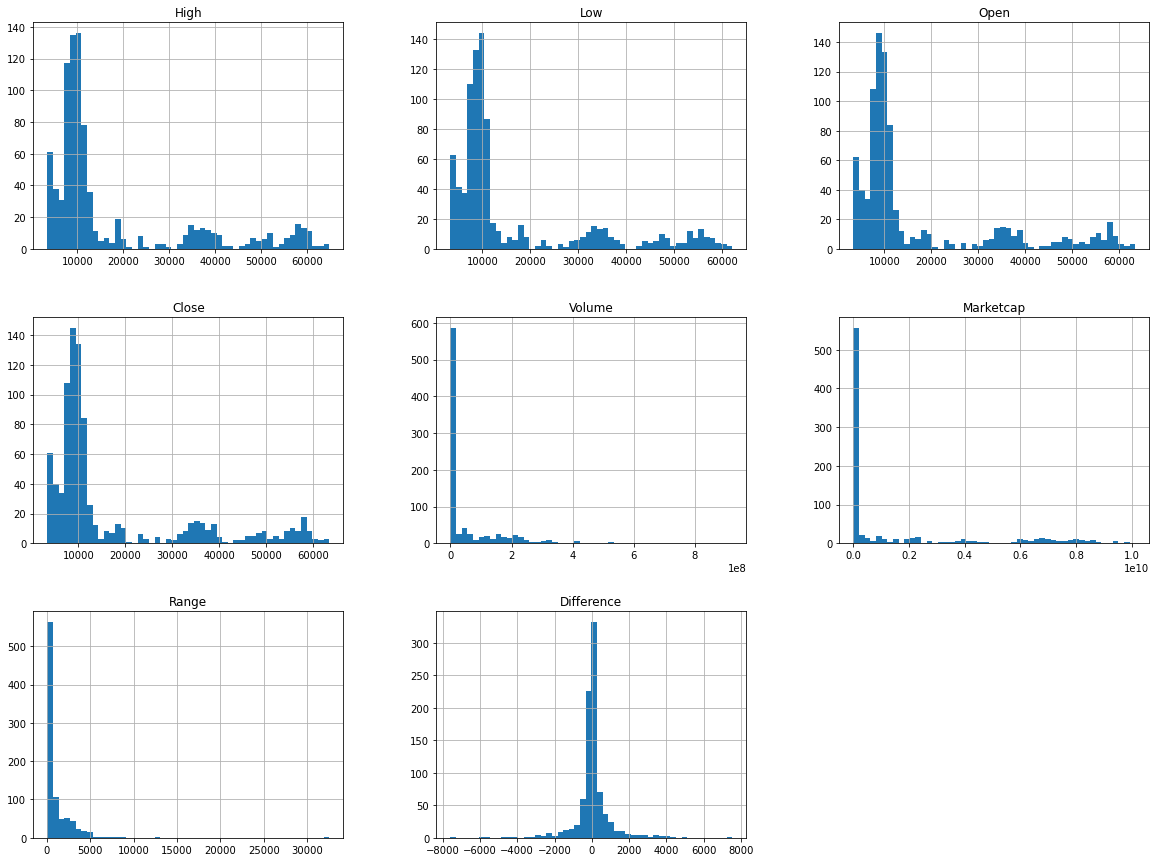

In [9]:
data[['High','Low','Open','Close','Volume','Marketcap','Range','Difference']].hist(bins=50, figsize = (20, 15))
plt.show();

In [10]:
#Days with the biggest price loss
data[['Date', 'Difference']].sort_values(by='Difference').head(10).T

,832,839,754,721,808,824,872,774,841,753
Date,2021-05-12 23:59:59,2021-05-19 23:59:59,2021-02-23 23:59:59,2021-01-21 23:59:59,2021-04-18 23:59:59,2021-05-04 23:59:59,2021-06-21 23:59:59,2021-03-15 23:59:59,2021-05-21 23:59:59,2021-02-22 23:59:59
Difference,-7586.297132,-6071.775084,-5580.251518,-4705.855253,-4525.199696,-4144.895849,-3988.416535,-3512.374006,-3481.96641,-3345.365185


In [11]:
# Days with the biggest price gain
data[['Date', 'Difference']].sort_values(by='Difference', ascending=False).head(10).T

,739,816,820,760,825,750,844,860,840,772
Date,2021-02-08 23:59:59,2021-04-26 23:59:59,2021-04-30 23:59:59,2021-03-01 23:59:59,2021-05-05 23:59:59,2021-02-19 23:59:59,2021-05-24 23:59:59,2021-06-09 23:59:59,2021-05-20 23:59:59,2021-03-13 23:59:59
Difference,7534.523221,4945.364381,4242.274918,4223.325868,4177.819827,4123.059388,3919.686532,3869.972282,3842.561465,3840.78862


In [12]:
fig = px.line(data, x='Date', y="Close")
fig.show();

In [13]:
fig = px.line(data, x='Date', y="Marketcap")
fig.show();

In [14]:
fig = px.line(data, x='Date', y="Difference")
fig.show();

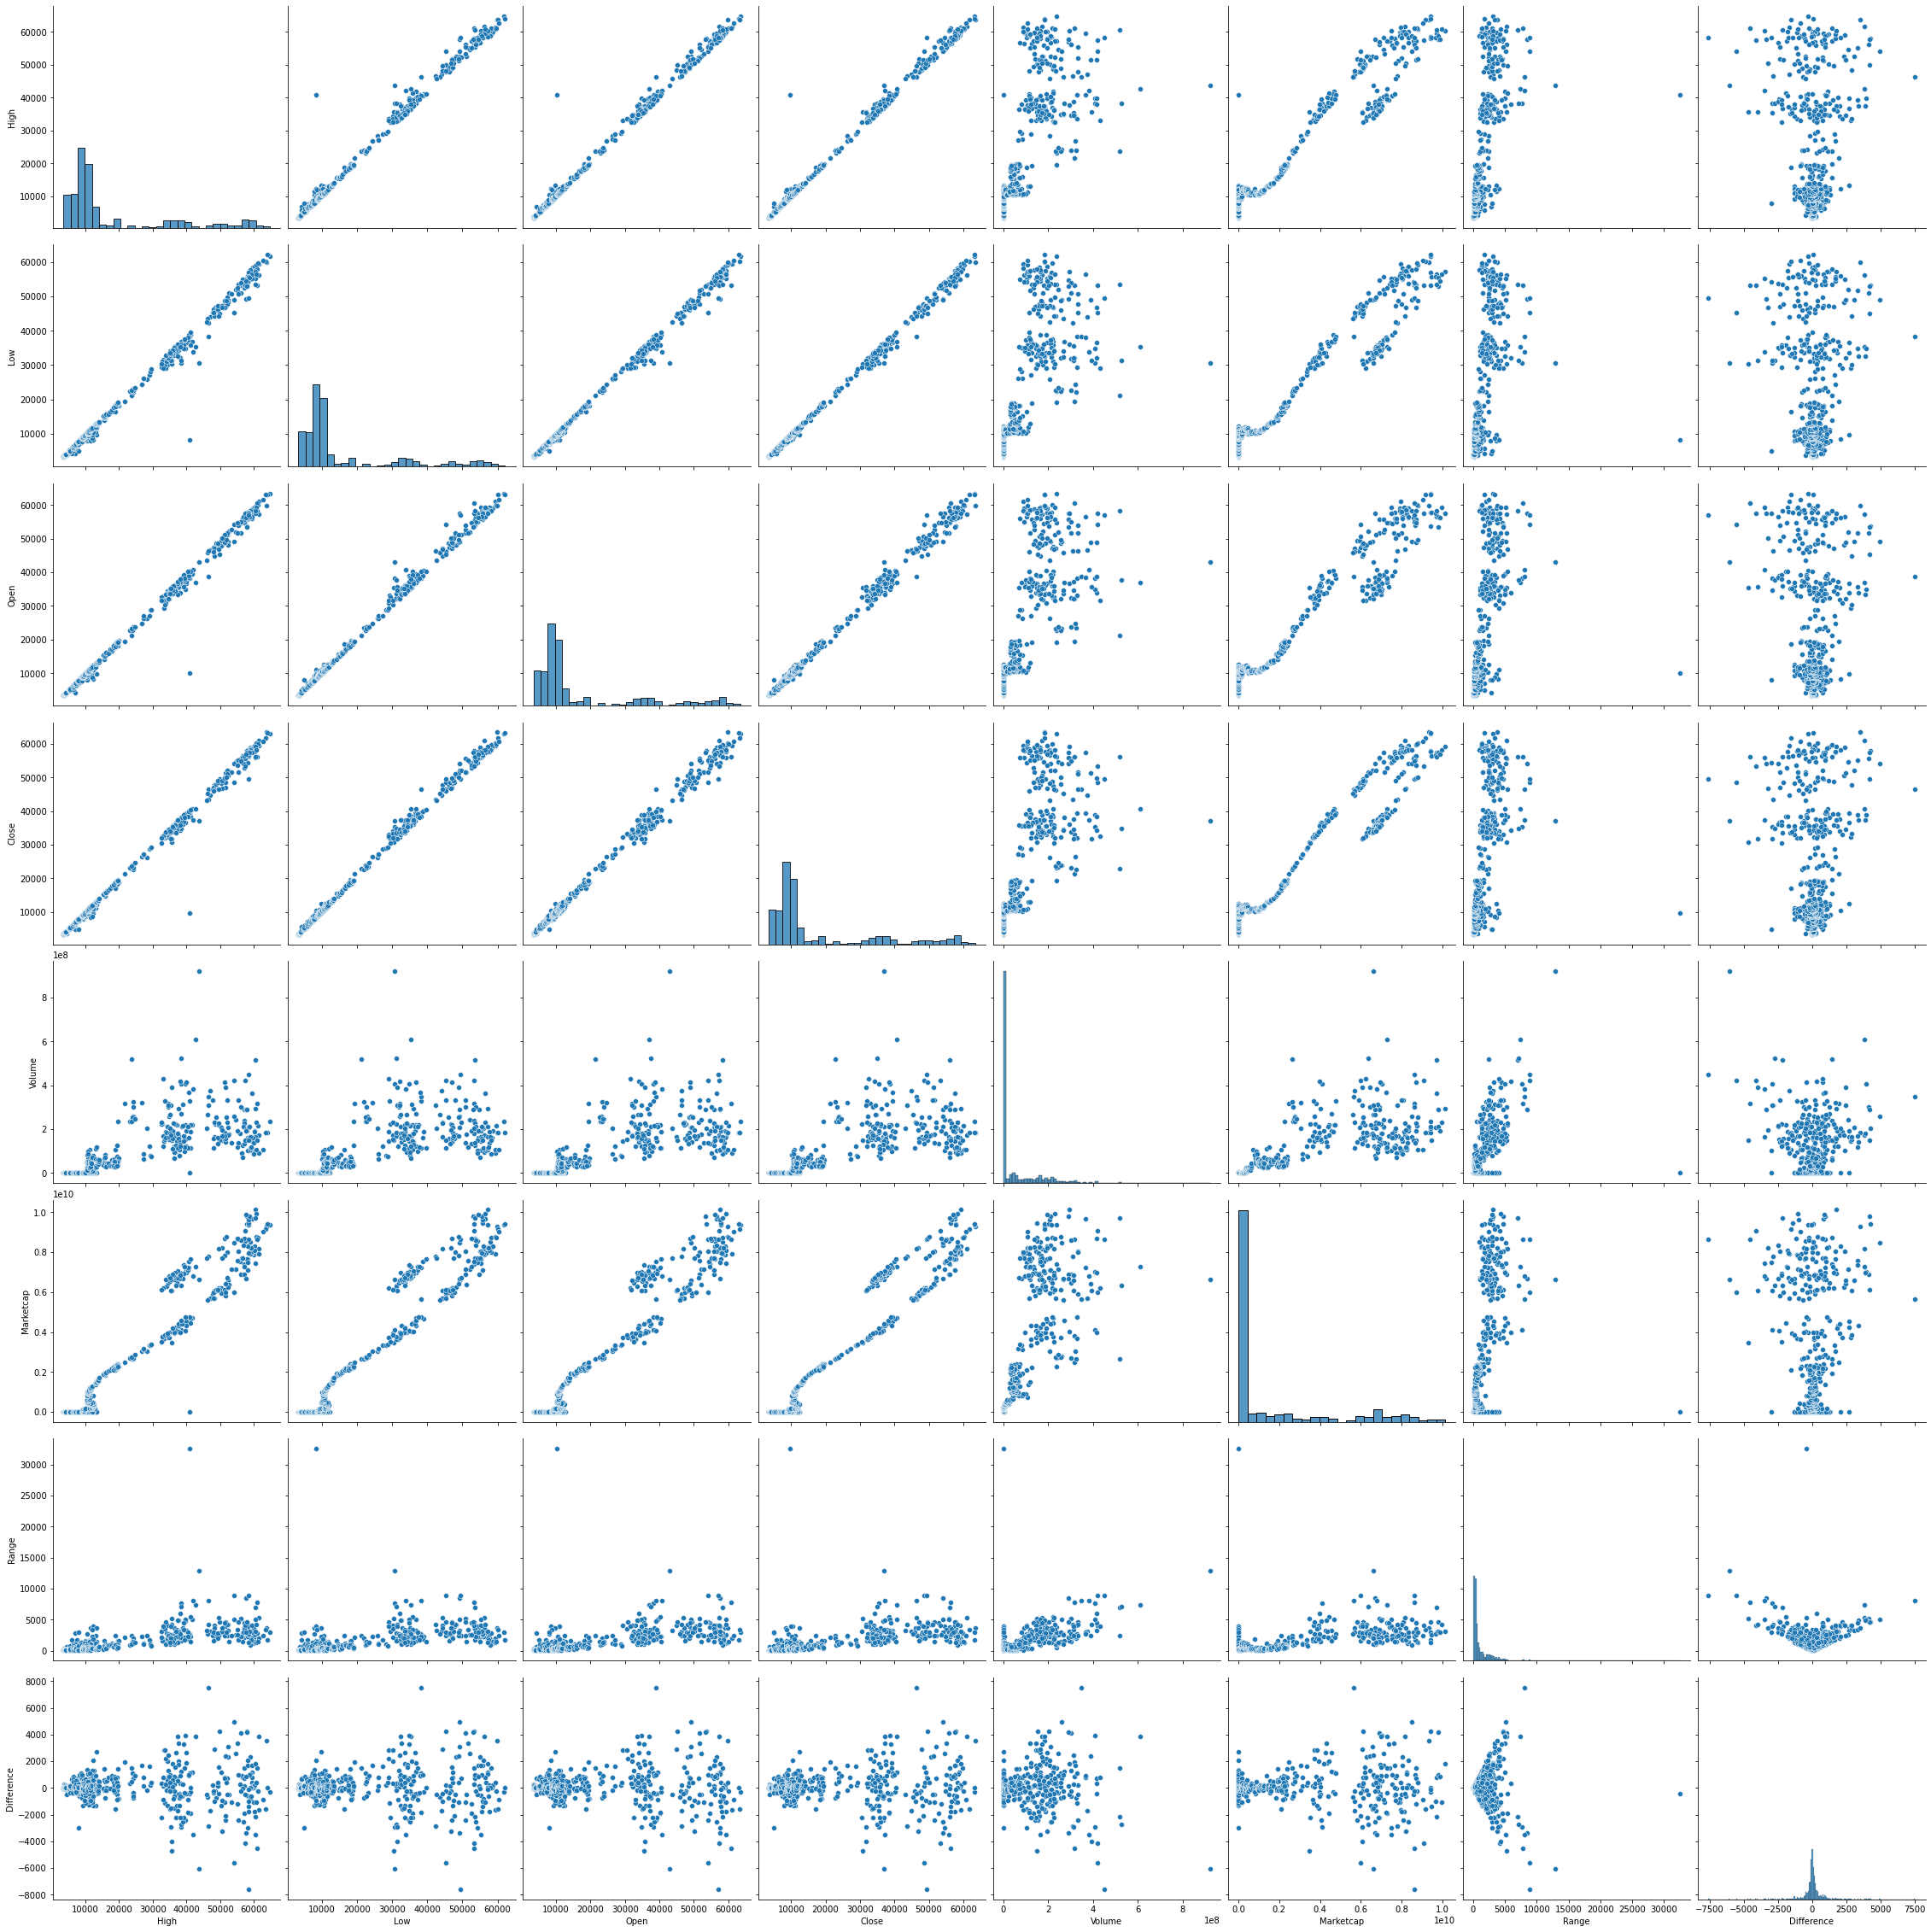

In [15]:
sns.pairplot(data,height=4);
